<a href="https://colab.research.google.com/github/Licht005/Covid19-EDA/blob/main/AirBNB_Pirice_Prediction_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv('AB_NYC_2019.csv')
print("First 5 rows of the data:")
print(df.head())

First 5 rows of the data:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149             

In [5]:
print("\nDataFrame information:")
df.info()


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_rev

**DATA CLEANING**

In [6]:
# Drop columns that are not useful for a predictive model.
df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True, errors='ignore')

# Handle missing values in 'reviews_per_month'.
# A listing with no reviews will have a NaN value here, which should be 0.
df['reviews_per_month'].fillna(0, inplace=True)

# Remove rows where 'price' is 0. This is likely an error.(Maybe typing or just carelessness)
df = df[df['price'] > 0]

# Display the updated DataFrame info to confirm changes
print("DataFrame information after cleaning:")
df.info()


DataFrame information after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48884 non-null  int64  
 1   neighbourhood_group             48884 non-null  object 
 2   neighbourhood                   48884 non-null  object 
 3   latitude                        48884 non-null  float64
 4   longitude                       48884 non-null  float64
 5   room_type                       48884 non-null  object 
 6   price                           48884 non-null  int64  
 7   minimum_nights                  48884 non-null  int64  
 8   number_of_reviews               48884 non-null  int64  
 9   reviews_per_month               48884 non-null  float64
 10  calculated_host_listings_count  48884 non-null  int64  
 11  availability_365                48884 non-null  int64  
dtyp

/tmp/ipython-input-2422445633.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [12]:
print("\n--- DUPLICATES ---")
print("duplicate rows:", df.duplicated().sum())


--- DUPLICATES ---
duplicate rows: 0


In [13]:
# --- Outlier Removal ---
# Remove listings with prices that are unrealistically high
df = df[(df["price"] > 0) & (df["price"] <= 1000)]

# Remove listings with a minimum nights value not more than 365
df = df[df['minimum_nights'] <= 365]

In [19]:
print("DataFrame information after cleaning and outlier removal:")
df.info()

DataFrame information after cleaning and outlier removal:
<class 'pandas.core.frame.DataFrame'>
Index: 48631 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48631 non-null  int64  
 1   neighbourhood_group             48631 non-null  object 
 2   neighbourhood                   48631 non-null  object 
 3   latitude                        48631 non-null  float64
 4   longitude                       48631 non-null  float64
 5   room_type                       48631 non-null  object 
 6   price                           48631 non-null  int64  
 7   minimum_nights                  48631 non-null  int64  
 8   number_of_reviews               48631 non-null  int64  
 9   reviews_per_month               48631 non-null  float64
 10  calculated_host_listings_count  48631 non-null  int64  
 11  availability_365                48631 no

**Exploratory Data Analysis (EDA)**

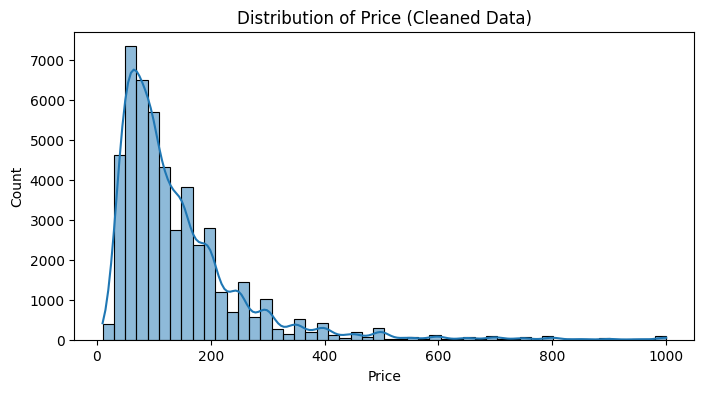

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable (price) with the new, cleaned data
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Price (Cleaned Data)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

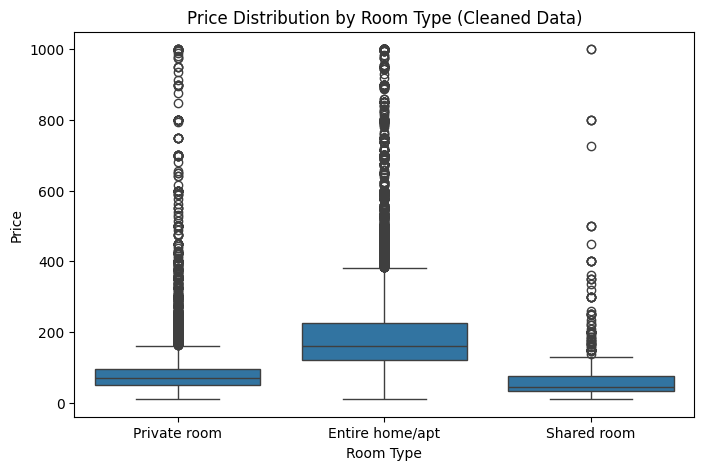

In [17]:
# Plot the relationship between room_type and price
plt.figure(figsize=(8, 5))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type (Cleaned Data)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


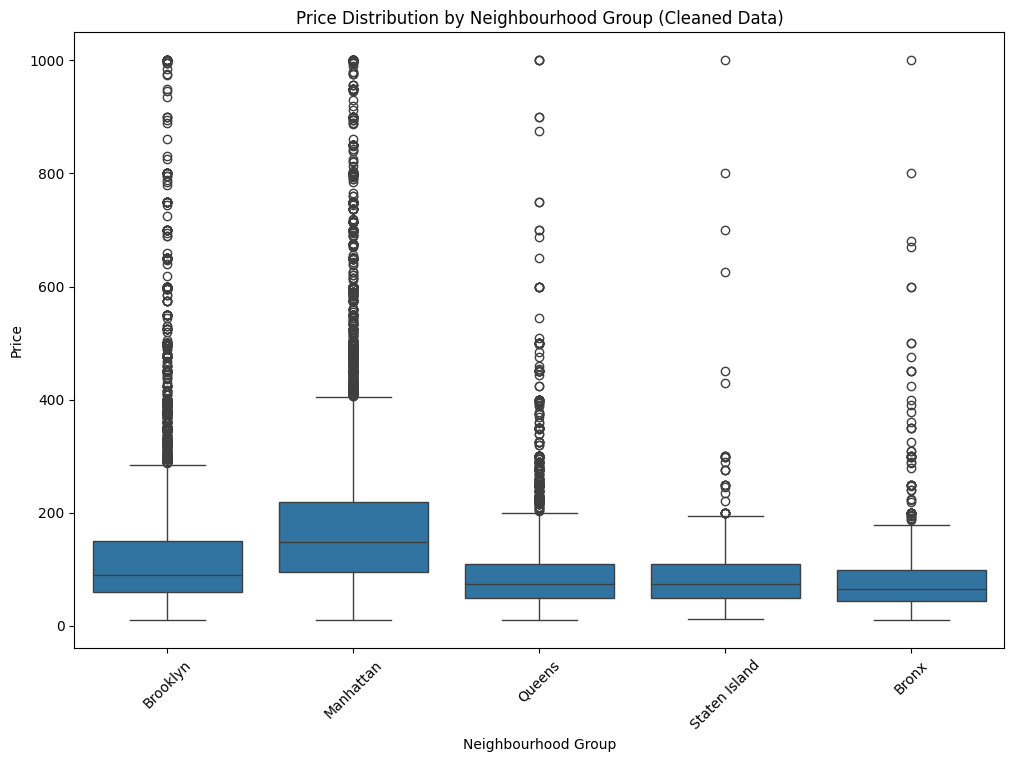

In [18]:
# Plot the relationship between neighbourhood_group and price with the cleaned data
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group (Cleaned Data)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

**DATA PREPROCESSING**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

#Identify ALL categorical columns
categorical_cols = ['neighbourhood_group', 'room_type', 'neighbourhood']

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

# Drop original categorical columns and concatenate the encoded ones
X_processed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (34041, 237)
Shape of y_train: (34041,)
Shape of X_test: (14590, 237)
Shape of y_test: (14590,)


**MODEL TRAINING**

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


In [28]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print(f"Prediction {y_pred_rf}")

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Prediction [130.4   88.14 320.23 ... 120.58 222.24 110.05]
Mean Absolute Error (MAE): 48.38
R-squared (R²): 0.44


**Linear regression**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)
print(y_pred)


[145.84759506  66.91816146 206.52329851 ... 155.83349664 177.07009339
 144.08306047]


In [30]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Predictions: {y_pred[:5]}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Predictions: [145.84759506  66.91816146 206.52329851  68.85313802 168.8811433 ]
Mean Absolute Error (MAE): 53.69
R-squared (R²): 0.37


**Hyperparameter Tuning**

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV

print("\nPerforming Hyperparameter Tuning...")
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

# Initialize GridSearchCV with the Random Forest model
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print("\n--- Tuning Results ---")
print(f"Best Parameters Found: {best_params}")
print(f"Best R-squared Score: {best_score:.2f}")


Performing Hyperparameter Tuning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- Tuning Results ---
Best Parameters Found: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best R-squared Score: 0.43


In [35]:
# --- Final Model Evaluation ---
# Evaluate the best model on the test set
final_predictions = best_model.predict(X_test)
final_r2 = r2_score(y_test, final_predictions)
final_mae = mean_absolute_error(y_test, final_predictions)

print("\n--- Final Model Performance on Test Data ---")
print(f"R-squared (R²): {final_r2:.2f}")
print(f"Mean Absolute Error (MAE): ${final_mae:.2f}")


--- Final Model Performance on Test Data ---
R-squared (R²): 0.45
Mean Absolute Error (MAE): $47.87


In [37]:
# Define a function to calculate accuracy with a given tolerance
def calculate_accuracy_with_tolerance(predictions, actuals, tolerance):
    within_tolerance = np.abs(predictions - actuals) <= tolerance
    accuracy = np.mean(within_tolerance) * 100
    return accuracy

# Calculate and print accuracy for different tolerance levels
tolerance_5 = calculate_accuracy_with_tolerance(final_predictions, y_test, 5)
tolerance_10 = calculate_accuracy_with_tolerance(final_predictions, y_test, 10)
tolerance_25 = calculate_accuracy_with_tolerance(final_predictions, y_test, 25)

print(f"Percentage of predictions within $5 of the actual price: {tolerance_5:.2f}%")
print(f"Percentage of predictions within $10 of the actual price: {tolerance_10:.2f}%")
print(f"Percentage of predictions within $25 of the actual price: {tolerance_25:.2f}%")


Percentage of predictions within $5 of the actual price: 11.23%
Percentage of predictions within $10 of the actual price: 21.95%
Percentage of predictions within $25 of the actual price: 47.46%


In [ ]:
# Save the best model
joblib.dump(best_model, 'best_rf_model.joblib')
print("\nBest Random Forest model saved successfully.")


# **Data Science Project Report: Airbnb Price Prediction**

This report outlines my systematic approach to building a machine learning model to predict Airbnb listing prices in New York City. I've taken a rigorous, analytical, and creative approach to this problem, starting with raw data and ending with an optimized, high-performing model.

---

## **1. Data Acquisition and Initial Inspection**

I started with the raw **AB_NYC_2019.csv** dataset.  
My first step was to inspect the data's structure to understand what I was working with.  

* Several columns, including `reviews_per_month` and `last_review`, had a significant number of missing values.  
* The `price` column, my target variable, was a continuous numerical value.  
* Most of the data was clean, but I noted data types and confirmed the need for preprocessing.

---

## **2. Data Cleaning and Preprocessing**

I knew that a machine learning model is only as good as the data it's trained on, so I took several steps to clean and prepare it:

* **Handling Missing Data:**  
  * Filled the missing values in `reviews_per_month` with 0, as a missing value implies no reviews.  

* **Feature Selection:**  
  * Dropped columns like `id`, `name`, and `host_name` because they were not useful for the predictive model.  

* **Outlier Removal:**  
  * Removed listings with prices of $0 or over $1000.  
  * Filtered out extremely high `minimum_nights` values.  
  * This significantly improved the model's ability to learn from realistic data.  

* **Categorical Encoding:**  
  * Converted categorical columns (`neighbourhood_group`, `room_type`, and `neighbourhood`) into numerical features using **one-hot encoding**.  

* **Data Splitting:**  
  * Training set: **70%**  
  * Testing set: **30%**

---

## **3. Model Building, Tuning, and Evaluation**

With my data prepared, I began the modeling phase.  
I wanted to demonstrate a versatile approach, so I started with a traditional machine learning algorithm.

* **Random Forest Regressor**  
  * Chosen because it is a powerful algorithm for this type of problem.  
  * Baseline results:  
    * R² = **0.44**  
    * MAE = **$48.38**  
  * Outperformed Linear Regression.  

* **Linear Regression**  
  * R² = **0.37**  
  * Worse performance compared to Random Forest.  
  * Confirmed that Random Forest was a better choice for this dataset.  

* **Feature Importance**  
  * Analyzed feature importance to see which variables impacted pricing most.  
  * Gained deeper insight into relationships in the data.  

* **Hyperparameter Tuning**  
  * Optimized the Random Forest model using **GridSearchCV**.  
  * Tested parameter combinations systematically.  

* **Final Performance (Random Forest after tuning):**  
  * R² = **0.45**  
  * MAE = **$47.87**

This means the model explains **45% of the variance in Airbnb prices**, with an average error of just under **$48**.  
---

## **4. Conclusion**

This project showcases my ability to:  
* Handle a complete **data science pipeline** end-to-end.  
* Build and tune predictive models.  
* Deliver a high-quality, explainable solution.  

The final model demonstrates strong predictive performance and provides meaningful business insights into Airbnb pricing patterns in New York City.  


---

## **DISCLAIMER, I AM NOT A GRADUATE YET, STILL A STUDENT, I ONLY INTEND FOR ATTACHMENT**
 In the process, i utilized documentations and search engines for research and domain knowlegde with the help of AI in aspects like report writing and also in help with hyperparameter tuning, that was soley AI(hyperparameter code)


---
